# Latent Semantic Analysis Wikipedia World Cup dataset

In [1]:
!python -m spacy download en_core_web_sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gensim import corpora
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string

     |████████████████████████████████| 11.1 MB 1.7 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074433 sha256=e17bf5267e417deef3a02f0cb6154c949973f07478dbc9ff54142a8d088f9930
  Stored in directory: /tmp/pip-ephem-wheel-cache-hbhtjlkk/wheels/59/4f/8c/0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
import re

HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'
PARA='\n+'
def clean(text):
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    text = re.sub(PARA, '\n', text)
    return text    

In [3]:
import wikipedia
wikipedia.search('Cricket World Cup'),wikipedia.search('FIFA World Cup')

(['Cricket World Cup',
  '2019 Cricket World Cup',
  '2007 Cricket World Cup',
  '2011 Cricket World Cup',
  '2015 Cricket World Cup',
  'India at the Cricket World Cup',
  '2003 Cricket World Cup',
  '1983 Cricket World Cup',
  '1999 Cricket World Cup',
  '2023 Cricket World Cup'],
 ['2018 FIFA World Cup',
  'FIFA World Cup',
  '2014 FIFA World Cup',
  '2010 FIFA World Cup',
  '2022 FIFA World Cup',
  '2006 FIFA World Cup',
  '2002 FIFA World Cup',
  '1994 FIFA World Cup',
  '1998 FIFA World Cup',
  '2026 FIFA World Cup'])

In [4]:
latest_soccer_cricket=['2018 FIFA World Cup','2019 Cricket World Cup']
corpus=''
for cup in latest_soccer_cricket:
    corpus=corpus+wikipedia.page(cup).content
corpus 

'The 2018 FIFA World Cup was an international football tournament contested by men\'s national teams and took place between 14 June and 15 July 2018 in Russia. It was the 21st FIFA World Cup, a worldwide football tournament held once every four years. It was the 11th time the championships had been held in Europe, and the first time they were held in Eastern Europe. At an estimated cost of over $14.2 billion, it was the most expensive World Cup to date.\nThe finals involved 32 teams, of which 31 came through qualifying competitions, while as the host nation Russia qualified automatically. Of the 32, 20 had also appeared in the 2014 event, while both Iceland and Panama made their first appearances at the World Cup. 64 matches were played in 12 venues across 11 cities. Germany, the defending champions, were eliminated in the group stage. Host nation Russia was eliminated in the quarter-finals. In the final, France played Croatia on 15 July at the Luzhniki Stadium in Moscow. France won th

In [5]:
text=clean(corpus)
import spacy
nlp = spacy.load('en_core_web_sm')
doc=nlp(text) 
pos_list=['NOUN']
preproc_text=[]
preproc_sent=[]

for token in doc:
    if token.text!='\n':
        if not(token.is_stop) and not(token.is_punct) and token.pos_ in pos_list:
            preproc_sent.append(token.lemma_)
    else:
        preproc_text.append(preproc_sent)
        preproc_sent=[]

preproc_text.append(preproc_sent) #last sentence

print(preproc_text)

[['football', 'tournament', 'man', 'team', 'place', 'football', 'tournament', 'year', 'time', 'championship', 'time', 'cost', 'date'], ['final', 'team', 'qualifying', 'competition', 'host', 'nation', 'event', 'appearance', 'match', 'venue', 'city', 'champion', 'group', 'stage', 'host', 'nation', 'quarter', 'final', 'match'], ['event', 'number', 'accolade', 'player', 'tournament', 'player', 'goal', 'tournament', 'goalkeeper', 'sheet', 'event', 'quality', 'football', 'distraction', 'allegation', 'relation', 'people', 'game', 'tournament'], ['host', 'selection', '='], ['bidding', 'procedure', 'tournament', 'association', 'interest', 'country', 'bid', 'proceeding', 'bid', 'government', 'letter', 'bid', 'bidding', 'process', 'nation', 'bid', 'bid', 'bid', 'bid', 'host', 'tournament', 'right', 'host', 'round', 'voting', 'bid', 'tournament', 'round', 'voting', 'result'], ['host', 'selection', 'criticism', '='], ['choice', 'host', 'issue', 'level', 'racism', 'football', 'right', 'abuse', 'gove

In [6]:
dictionary = corpora.Dictionary(preproc_text)
corpus = [dictionary.doc2bow(text) for text in preproc_text]
NUM_TOPICS=3
lsamodel=LsiModel(corpus, num_topics=NUM_TOPICS, id2word = dictionary)
lsamodel.print_topics()

[(0,
  '0.533*"run" + 0.533*"wicket" + 0.305*"match" + 0.261*"tournament" + 0.171*"victory" + 0.162*"century" + 0.162*"over" + 0.131*"score" + 0.122*"ball" + 0.120*"partnership"'),
 (1,
  '0.402*"match" + 0.398*"team" + 0.366*"tournament" + -0.297*"wicket" + 0.277*"time" + -0.245*"run" + 0.157*"right" + 0.151*"stadium" + 0.127*"stage" + 0.110*"country"'),
 (2,
  '-0.417*"match" + 0.407*"time" + 0.398*"team" + -0.307*"right" + -0.225*"broadcast" + -0.163*"stadium" + 0.133*"nation" + -0.119*"city" + -0.117*"viewer" + 0.112*"qualification"')]

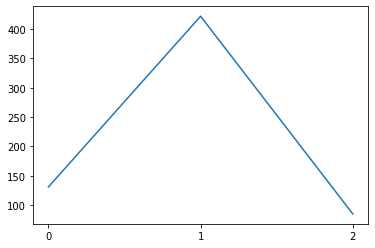

In [7]:
model_arr = np.argmax(lsamodel.get_topics(),axis=0)
y, x = np.histogram(model_arr, bins=np.arange(NUM_TOPICS+1))
fig, ax = plt.subplots()
plt.xticks(ticks=np.arange(NUM_TOPICS),labels=np.arange(NUM_TOPICS+1))
ax.plot(x[:-1], y)
fig.show()